# Plot log2 fold change in ribosome occupancy on mTORC1 and GCN2 target genes upon arginine versus leucine limitation : Heatmaps & Box-plots
 <p><div class="lev1 toc-item"><a href="#Build-GCN2-(ATF4/CHOP)-&-mTORC1-target-gene-lists" ><span class="toc-item-num">1&nbsp;&nbsp;</span>Build GCN2 (ATF4/CHOP) & mTORC1 target gene lists</a></div><div class="lev1 toc-item"><a href="#GCN2-signaling-heatmaps-(ATF4/CHOP-targets)" ><span class="toc-item-num">2&nbsp;&nbsp;</span>GCN2 signaling heatmaps (ATF4/CHOP targets)</a></div><div class="lev1 toc-item"><a href="#mTORC1-signaling-heatmaps"><span class="toc-item-num">3&nbsp;&nbsp;</span>mTORC1 signaling heatmaps</a></div><div class="lev1 toc-item"><a href="#Log-FC-Box-Plots:-mTORC1-targets" ><span class="toc-item-num">4&nbsp;&nbsp;</span>Log FC Box Plots: mTORC1 targets</a></div><div class="lev1 toc-item"><a href="#Log-FC-Box-Plots:-ATF4/CHOP-targets" ><span class="toc-item-num">5&nbsp;&nbsp;</span>Log FC Box Plots: ATF4/CHOP targets</a></div>

# Build GCN2 (ATF4/CHOP) & mTORC1 target gene lists

## Import libraries

In [245]:
library(BSgenome.Hsapiens.UCSC.hg38)
library(org.Hs.eg.db)
library(hom.Mm.inp.db)
library(rtracklayer)
library(GenomicFeatures)
library(broom)
library(stringr)
library(magrittr)
library(tidyverse)
library(readxl)
library(forcats)
library(ggpubr)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica") +
theme(          
  strip.background = element_blank(),
  axis.line = element_line(size=.5, color = "darkgrey")
))
options(warn = -1)

## get CDS annotations

In [246]:
genome <- BSgenome.Hsapiens.UCSC.hg38
cdsfile <- '../sequence_annotation_files/gencode.v24.canonical_ccds_transcripts.20170315.gff3'

cds <- import.gff3(cdsfile) %>% 
  as_tibble %>% 
  filter(type == 'CDS') %>% 
  group_by(transcript_id) %>% 
  slice(1) %>% 
  select(transcript_id, gene_name, protein_id) %>% 
  print

# A tibble: 18,660 x 3
# Groups:   transcript_id [18,660]
        transcript_id gene_name        protein_id
                <chr>     <chr>             <chr>
 1  ENST00000000233.9      ARF5 ENSP00000000233.5
 2  ENST00000000412.7      M6PR ENSP00000000412.3
 3 ENST00000000442.10     ESRRA ENSP00000000442.6
 4  ENST00000001008.5     FKBP4 ENSP00000001008.4
 5  ENST00000001146.6   CYP26B1 ENSP00000001146.2
 6  ENST00000002125.8   NDUFAF7 ENSP00000002125.4
 7 ENST00000002165.10     FUCA2 ENSP00000002165.5
 8 ENST00000002501.10    DBNDD1 ENSP00000002501.6
 9  ENST00000002596.5    HS3ST1 ENSP00000002596.5
10  ENST00000002829.7    SEMA3F ENSP00000002829.3
# ... with 18,650 more rows


## get all CDS for humans

In [247]:
human_annotations <- '../sequence_annotation_files/gencode.v24.annotation.gff3'

human_cds <- import.gff3(human_annotations) %>% 
  as_tibble %>% 
  filter(type == 'CDS') %>%
  select(transcript_id, gene_name, protein_id) %>% 
  group_by(transcript_id) %>%  
  slice(1) %>% 
  print

# A tibble: 93,855 x 3
# Groups:   transcript_id [93,855]
        transcript_id gene_name        protein_id
                <chr>     <chr>             <chr>
 1  ENST00000000233.9      ARF5 ENSP00000000233.5
 2  ENST00000000412.7      M6PR ENSP00000000412.3
 3 ENST00000000442.10     ESRRA ENSP00000000442.6
 4  ENST00000001008.5     FKBP4 ENSP00000001008.4
 5  ENST00000001146.6   CYP26B1 ENSP00000001146.2
 6  ENST00000002125.8   NDUFAF7 ENSP00000002125.4
 7 ENST00000002165.10     FUCA2 ENSP00000002165.5
 8 ENST00000002501.10    DBNDD1 ENSP00000002501.6
 9  ENST00000002596.5    HS3ST1 ENSP00000002596.5
10  ENST00000002829.7    SEMA3F ENSP00000002829.3
# ... with 93,845 more rows


## get all CDS for mouse

In [248]:
mouse_annotations <- '../sequence_annotation_files/gencode.vM9.annotation.gff3.gz'

mouse_cds <- import.gff3(mouse_annotations) %>% 
  as_tibble %>% 
  filter(type == 'CDS') %>%
  select(transcript_id, gene_name, protein_id) %>% 
  group_by(transcript_id) %>%  
  slice(1) %>% 
  print

# A tibble: 57,324 x 3
# Groups:   transcript_id [57,324]
           transcript_id gene_name           protein_id
                   <chr>     <chr>                <chr>
 1  ENSMUST00000000001.4     Gnai3 ENSMUSP00000000001.4
 2 ENSMUST00000000003.13      Pbsn ENSMUSP00000000003.7
 3  ENSMUST00000000010.8     Hoxb9 ENSMUSP00000000010.8
 4 ENSMUST00000000028.13     Cdc45 ENSMUSP00000000028.7
 5 ENSMUST00000000033.11      Igf2 ENSMUSP00000000033.5
 6  ENSMUST00000000049.5      Apoh ENSMUSP00000000049.5
 7  ENSMUST00000000058.6      Cav2 ENSMUSP00000000058.6
 8  ENSMUST00000000080.6      Klf6 ENSMUSP00000000080.6
 9 ENSMUST00000000087.12     Scmh1 ENSMUSP00000000087.6
10  ENSMUST00000000090.6     Cox5a ENSMUSP00000000090.6
# ... with 57,314 more rows


## read counts and fold changes for all combinations

In [249]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))

subsetsamples <- read_tsv('../tables/samplepairs_for_deseq2.tsv', 
                          col_types = c(col_character())) %>% 
  gather(sample, samplename) %>% 
  distinct(samplename) %>% 
  pull(samplename) %>% 
  str_replace('293', 'X293')

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id, length)

lfcdata  <- lfcdata %>% 
  right_join(subsettx, by = "transcript_id")

print(subsettx)

# A tibble: 3,097 x 2
        transcript_id length
                <chr>  <int>
 1  ENST00000229239.9   1008
 2  ENST00000336023.9   1356
 3  ENST00000309311.6   2577
 4  ENST00000369159.2    393
 5 ENST00000216281.12   2199
 6  ENST00000468812.5    498
 7 ENST00000309268.10   1389
 8  ENST00000331789.9   1128
 9  ENST00000376263.7   1395
10  ENST00000331925.6   1128
# ... with 3,087 more rows


## read in ATF4/CHOP mouse targets from CHIPseq data, Han et al. 2013

In [ ]:
atf4_chop_chipseq_mouse <- read_xlsx('../db/atf4chop_han2013/NIHMS485042-supplement-Table_2.xlsx', skip = 2)

In [252]:
atf4_chop_chipseq_mouse %>% 
  group_by(Overlap) %>% 
  summarise(n())

Overlap,n()
ATF4_Only,254
CHOP_Only,103
Common,218


## match mouse Atf4/CHOP targets to human homologs to create Atf4/CHOP target list

In [253]:
atf4_target_mouse_proteins <- mouse_cds %>% 
  # extract all mouse genes in atf4 targets
  filter(gene_name %in% atf4_chop_chipseq_mouse[['Symbol']]) %>% 
  # clean Ensembl protein iD for homolog search
  mutate(protein_id = str_extract(protein_id, "^[^\\.]+")) %>% 
  # get distinct proteins
  distinct(protein_id) %>% 
  # pick only proteins that have human homologs
  inner_join(tibble(protein_id = mappedkeys(hom.Mm.inpHOMSA)), by = "protein_id")

# find human homolog protein
humanhomologs <- hom.Mm.inpHOMSA[atf4_target_mouse_proteins[['protein_id']]] %>% 
  as.list %>% unlist %>% tibble %>% 
  set_colnames("protein_id")

# convert humann homolog proteins in human gene symbols
human_atf4_targets <- human_cds %>% 
  mutate(protein_id = str_extract(protein_id, "^[^\\.]+")) %>% 
  ungroup %>% 
  right_join(humanhomologs) %>% 
  select(gene_name) %>%
  distinct(gene_name) %>% 
  # add ATF4 which is technically not a target but we want to plot
  bind_rows(list('gene_name' = 'ATF4')) %>% 
  print

Joining, by = "protein_id"


# A tibble: 367 x 1
   gene_name
       <chr>
 1    SCPEP1
 2  SERPINF1
 3     ITGB7
 4     COASY
 5   ANGPTL4
 6      GARS
 7     WARS2
 8     CLCN3
 9      <NA>
10     WISP1
# ... with 357 more rows


## read in mTORC1 human targets from ribosome profiling data (downregulated upon pp242 treatment), Hsieh et. al 2012

In [257]:
pp242_rp_human <- read_xlsx("../db/pp242_downreg/pp242_refseqtogenename_davidoutput.xlsx")

In [258]:
pp242_rp_human %>% 
  summarise(n())
head(pp242_rp_human)

n()
143


refseq,gene_name,Species,Gene Name
NM_001064,TKT,Homo sapiens,transketolase(TKT)
NM_033643,RPL36,Homo sapiens,ribosomal protein L36(RPL36)
NM_016142,HSD17B12,Homo sapiens,hydroxysteroid 17-beta dehydrogenase 12(HSD17B12)
NM_006013,RPL10,Homo sapiens,ribosomal protein L10(RPL10)
NM_003831,RIOK3,Homo sapiens,RIO kinase 3(RIOK3)
NM_015710,GLTSCR2,Homo sapiens,glioma tumor suppressor candidate region gene 2(GLTSCR2)


In [ ]:
targetlist <- pp242_rp_human[['gene_name']]
targetlist
length(targetlist)

## match human mTORC1 targets to human CDS list to create mTORC1 target list

In [260]:
mtorc1_target_human_proteins <- human_cds %>% 
  filter(gene_name %in% targetlist) %>% 
  ungroup %>%
  select(gene_name) %>%
  distinct(gene_name) %>% 
  print

# A tibble: 141 x 1
   gene_name
       <chr>
 1     RPS20
 2    BOD1L1
 3     RPL18
 4      RPS5
 5      RPL6
 6      RPL3
 7      ST13
 8    EEF1A2
 9      AHCY
10      AGO2
# ... with 131 more rows


# GCN2 signaling heatmaps (ATF4/CHOP targets)

## GCN2 signaling response in HEK293T, HCT116, HeLa at 3 hours (fig. 3d)

### Read in fold-changes for three cell types, WT, arg / leu starvation

In [261]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

#print(lfcdata)

### Subset genes that are upregulated across all cell types and conditions

In [262]:
subsettx <- lfcdata %>%
  # select only genes that are upregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_rpC", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) #%>% 
  #print

### Plot heat-map of fold-change for ATF4/CHOP targets that are up-regulated across all celltypes and conditions in our dataset

In [263]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) #%>% 
  #print

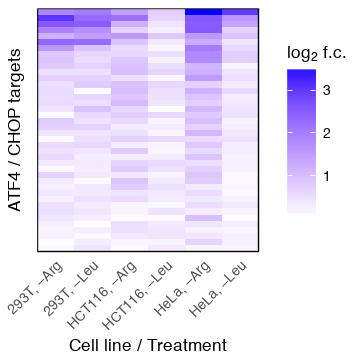

In [264]:
options(repr.plot.width = 3, repr.plot.height = 3)

samplenames  <- c(
    'hct116_arg' = 'HCT116, –Arg',
    'hct116_leu' = 'HCT116, –Leu',
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% #sum.lfc can be changed to X293t_arg or a different sample to change how the map is ordered
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'white', high = 'blue',name=(expression(paste("log"[2], " f.c.")))) +
  scale_x_discrete(expand = c(0,0)) +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_blank(),panel.grid = element_blank(), panel.border = element_rect(colour = "black", fill=NA, size=0.5*.588),legend.title.align =0) +
  ylab("ATF4 / CHOP targets") +
  xlab("Cell line / Treatment")

axis.ticks = element_blank()
#ggsave('../figures/atf4_targets_upinall_all3celllines3h_heatmap.svg', width = 3, height = 3, units = 'in')

### Find the number of genes that are more up-regulated during Arg versus Leu limitation

In [265]:
cat(paste("Total of", nrow(heatmapdata), "Atf4 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.\n\n"))

cat("Following number of ATF4 targets are more up-regulated during Arg starvation than Leu starvation:\n\n")

heatmapdata %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  separate(condition, c("cellline", "treatment"), "_") %>% 
  spread(treatment, lfc) %>% 
  mutate(diff = arg - leu) %>% 
  filter(diff > 0) %>% 
  group_by(cellline) %>%
  summarise(n = n())

Total of 40 Atf4 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.

Following number of ATF4 targets are more up-regulated during Arg starvation than Leu starvation:



cellline,n
hct116,35
hela,40
X293t,26


## repeat analysis for time course of GCN2 signaling response in HEK293T cells : 3 hours versus 6 hours (supp. fig. 3d)

In [266]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h',
            'X293t_arg_6h.vs.X293t_rich_6h',
            'X293t_leu_6h.vs.X293t_rich_6h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

print(lfcdata)

# A tibble: 6,344 x 5
   X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h
                                   <dbl>                                 <dbl>
 1                                -0.191                                 0.012
 2                                -0.073                                -0.003
 3                                -0.131                                -0.705
 4                                 0.343                                -1.074
 5                                 0.076                                 0.569
 6                                -0.202                                 0.309
 7                                -0.342                                -0.883
 8                                -0.004                                -0.355
 9                                 0.454                                 0.485
10                                -0.081                                -0.740
# ... with 6,334 more rows, an

In [267]:
subsettx <- lfcdata %>%
  # select only genes that are upregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  select(-transcript_id) #%>%
  #print

In [268]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc))

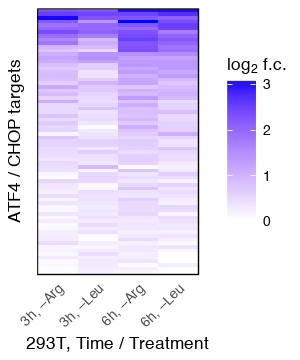

In [269]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

samplenames  <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h' = '3h, –Arg',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h' = '3h, –Leu',
    'X293t_arg_6h.vs.X293t_rich_6h' = '6h, –Arg',
    'X293t_leu_6h.vs.X293t_rich_6h' = '6h, –Leu')


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'white', high = 'blue',name=(expression(paste("log"[2], " ","f.c.")))) +
  scale_x_discrete(expand = c(0,0)) +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_blank(),panel.grid = element_blank(), panel.border = element_rect(colour = "black", fill=NA, size=.5*.588),legend.title.align =0) +
  ylab("ATF4 / CHOP targets") +
  xlab("293T, Time / Treatment")

axis.ticks = element_blank()
#ggsave('../figures/atf4_targets_upinall_293t_allwt_heatmap.svg', width = 2.5, height = 3, units = 'in')

In [276]:
cat(paste("Total of", nrow(heatmapdata), "Atf4 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.\n\n"))

cat("Following number of ATF4 targets are more up-regulated during Arg starvation than Leu starvation:\n\n")
celllinenames = c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h' = 'X293t_arg_3h.vs.X293t_rich_3h', 'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h' = 'X293t_leu_3h.vs.X293t_rich_3h', 'X293t_arg_6h.vs.X293t_rich_6h' = 
                 'X293t_arg_6h.vs.X293t_rich_6h', 'X293t_leu_6h.vs.X293t_rich_6h' = 'X293t_leu_6h.vs.X293t_rich_6h')
heatmapdata %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% mutate(condition = celllinenames[condition]) %>%
  separate(condition, c("cellline", "treatment", 'time'), "_") %>% 
  spread(treatment, lfc) %>% 
  mutate(diff = arg - leu) %>% 
  filter(diff > 0) %>% 
  group_by(time) %>%
  summarise(n = n())

Total of 73 Atf4 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.

Following number of ATF4 targets are more up-regulated during Arg starvation than Leu starvation:

# A tibble: 292 x 5
   gene_name cellline treatment        time   lfc
 *     <chr>    <chr>     <chr>       <chr> <dbl>
 1   SLC7A11    X293t       arg 3h.vs.X293t 2.362
 2      STC2    X293t       arg 3h.vs.X293t 2.549
 3     DDIT4    X293t       arg 3h.vs.X293t 3.059
 4       CTH    X293t       arg 3h.vs.X293t 2.220
 5      ATF4    X293t       arg 3h.vs.X293t 1.860
 6     SESN2    X293t       arg 3h.vs.X293t 2.047
 7      ATF3    X293t       arg 3h.vs.X293t 2.375
 8      ASNS    X293t       arg 3h.vs.X293t 1.936
 9      PCK2    X293t       arg 3h.vs.X293t 1.608
10   TSC22D3    X293t       arg 3h.vs.X293t 1.827
# ... with 282 more rows


time,n
3h.vs.X293t,43
6h.vs.X293t,47


# mTORC1 signaling heatmaps

## mTORC1 signaling response in HEK293T, HCT116, HeLa at 3 hours (fig. 3c)

In [277]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

In [278]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_rpC", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) 

In [279]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) 

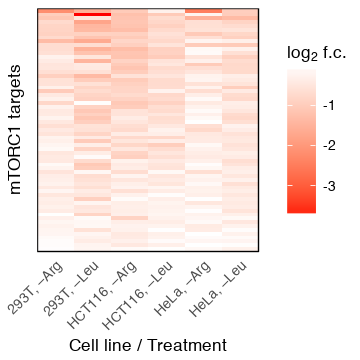

In [280]:
options(repr.plot.width = 3, repr.plot.height = 3)

samplenames  <- c(
    'hct116_arg' = 'HCT116, –Arg',
    'hct116_leu' = 'HCT116, –Leu',
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = T)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'red1', high = 'white',name=(expression(paste("log"[2], " f.c.")))) +
  scale_x_discrete(expand = c(0,0)) +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_blank(),panel.grid = element_blank(), panel.border = element_rect(colour = "black", fill=NA, size=0.5*.588),legend.title.align =0) +
  ylab("mTORC1 targets") +
  xlab("Cell line / Treatment")

axis.ticks = element_blank()
#ggsave('../figures/mtorc1_hsiehtargets_downinall_all3celllines3h_heatmap.svg', width = 3, height = 3, units = 'in')

In [281]:
cat(paste("Total of", nrow(heatmapdata), "mTORC1 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.\n\n"))

cat("Following number of ATF4 targets are more up-regulated during Arg starvation than Leu starvation:\n\n")

heatmapdata %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  separate(condition, c("cellline", "treatment"), "_") %>% 
  spread(treatment, lfc) %>% 
  mutate(diff = arg - leu) %>% 
  filter(diff > 0) %>% 
  group_by(cellline) %>%
  summarise(n = n())

Total of 63 mTORC1 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.

Following number of ATF4 targets are more up-regulated during Arg starvation than Leu starvation:



cellline,n
hct116,14
hela,45
X293t,46


## repeat analysis for time course of mTORC1 signaling response in HEK293T cells : 3 hours versus 6 hours (supp. fig. 3c)

In [282]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h',
            'X293t_arg_6h.vs.X293t_rich_6h',
            'X293t_leu_6h.vs.X293t_rich_6h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

In [283]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  select(-transcript_id)

In [284]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc))

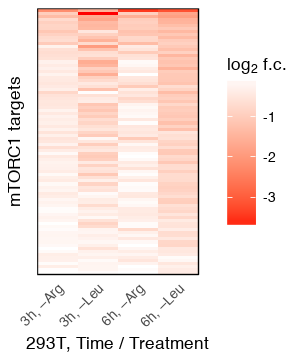

In [285]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

samplenames  <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h' = '3h, –Arg',
                'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h'= '3h, –Leu',
                'X293t_arg_6h.vs.X293t_rich_6h' = '6h, –Arg',
                'X293t_leu_6h.vs.X293t_rich_6h' = '6h, –Leu')


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = T)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'red1', high = 'white',name=(expression(paste("log"[2], " ","f.c.")))) +
  scale_x_discrete(expand = c(0,0)) +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_blank(),panel.grid = element_blank(), panel.border = element_rect(colour = "black", fill=NA, size=0.5*.588),legend.title.align =0) +
  ylab("mTORC1 targets") +
  xlab("293T, Time / Treatment")

axis.ticks = element_blank()
#ggsave('../figures/mtorc1_targets_downinall_293t_wtall_heatmap.svg', width = 2.5, height = 3, units = 'in')

In [286]:
cat(paste("Total of", nrow(heatmapdata), "Atf4 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.\n\n"))

cat("Following number of mTOR targets are more up-regulated during Arg starvation than Leu starvation:\n\n")
celllinenames = c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h' = 'X293t_arg_3h.vs.X293t_rich_3h', 'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h' = 'X293t_leu_3h.vs.X293t_rich_3h', 'X293t_arg_6h.vs.X293t_rich_6h' = 
                 'X293t_arg_6h.vs.X293t_rich_6h', 'X293t_leu_6h.vs.X293t_rich_6h' = 'X293t_leu_6h.vs.X293t_rich_6h')
heatmapdata %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% mutate(condition = celllinenames[condition]) %>%
  separate(condition, c("cellline", "treatment", 'time'), "_") %>% 
  spread(treatment, lfc) %>% 
  mutate(diff = arg - leu) %>% 
  filter(diff > 0) %>% 
  group_by(time) %>%
  summarise(n = n())

Total of 87 Atf4 target genes are down-regulated across all three cell lines and during both Leu and Arg starvation.

Following number of mTOR targets are more up-regulated during Arg starvation than Leu starvation:



time,n
3h.vs.X293t,67
6h.vs.X293t,77


# Log FC Box Plots: mTORC1 targets

## plot difference in log fc for each mTORC1 target gene in -Arg versus -Leu, HEK293T vs HCT116 vs HeLa (supp. fig. 3g, left panel; accompanies fig. 3c/e)

In [208]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for plotting
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_rpC", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id)

# calculate the diff in log fc for each target, -Arg - -Leu
plotdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  mutate(diff_hct116 = hct116_arg - hct116_leu)  %>%
  mutate(diff_hela = hela_arg - hela_leu) %>%
  mutate(diff_293t = X293t_arg - X293t_leu)


	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_hela
V = 1535, p-value = 0.0003128
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_hct116
V = 335.5, p-value = 4.212e-06
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_293t
V = 1648.5, p-value = 1.178e-05
alternative hypothesis: true location is not equal to 0


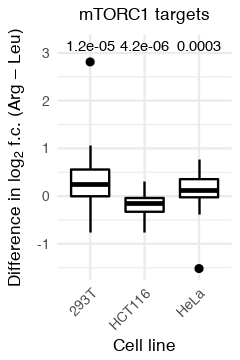

In [216]:
options(repr.plot.width = 2, repr.plot.height = 3)

samplenames  <- c(
    'diff_hct116' = 'HCT116',
    'diff_hela' = 'HeLa',
    'diff_293t' = '293T'
)

plotdata %>% 
  select(gene_name, diff_hct116, diff_hela, diff_293t) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  mutate(condition = forcats::fct_rev(condition)) %>%
  ggpubr::ggboxplot(x = 'condition',
                    y = 'lfc',
                    color = 'black', size = 0.5,
                    legend = "none",
                    order = c('293T','HCT116','HeLa')) + 
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8), 
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust =0.5, size=10)) +
  ylab(expression(paste('Difference in', " log"[2], ' f.c. (Arg – Leu)'))) +
  xlab("Cell line") +
  labs(title = 'mTORC1 targets') +
  theme(legend.position="none") 

#perform Wilcoxon signed rank test for statistical signficance
wilcox.test(plotdata$diff_293t, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_hct116, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_hela, mu = 0, alternative = "two.sided")


#ggsave('../figures/jitter_difflfc_mtortargets_threshlt0_all3celllines3h.svg', width = 2, height = 3, units = 'in')

## plot absolute log fc values for each mTORC1 target gene in -Arg versus -Leu, HEK293T vs HCT116 vs HeLa (fig. 3e, accompanies fig. 3c)

In [214]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for plotting
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h',
            '293t_arg_6h.vs.293t_rich_6h',
            '293t_leu_6h.vs.293t_rich_6h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_rpC", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id)

# calculate the diff in log fc for each target, -Arg - -Leu
plotdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  mutate(diff_hct116 = hct116_arg - hct116_leu)  %>%
  mutate(diff_hela = hela_arg - hela_leu) %>%
  mutate(diff_293t = X293t_arg - X293t_leu)

mean(plotdata[['diff_293t']])
mean(plotdata[['diff_hct116']])
mean(plotdata[['diff_hela']])


	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_hela
V = 1535, p-value = 0.0003128
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_hct116
V = 335.5, p-value = 4.212e-06
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_293t
V = 1648.5, p-value = 1.178e-05
alternative hypothesis: true location is not equal to 0


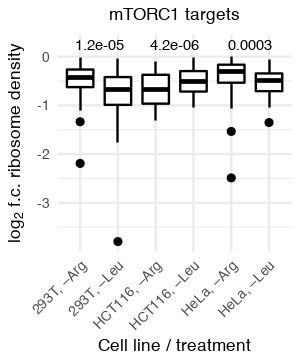

In [215]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

samplenames  <- c(
    'hct116_arg' = 'HCT116, –Arg',
    'hct116_leu' = 'HCT116, –Leu',
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


plotdata %>% 
  select(-protein_id, -sum.lfc, -diff_hct116, -diff_hela, -diff_293t) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggpubr::ggboxplot(x = 'condition',
                    y = 'lfc',
                    color = 'black', 
                    size = 0.5, 
                    order = c('293T, –Arg','293T, –Leu','HCT116, –Arg','HCT116, –Leu','HeLa, –Arg','HeLa, –Leu'),
                    legend = "none") +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8), 
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust =0.5, size=10)) +
  ylab(expression(paste("log"[2], ' f.c. ribosome density'))) +
  xlab("Cell line / treatment") +
  labs(title = 'mTORC1 targets') +
  theme(legend.position="none") +
  annotate("text", x = 5.5, y = .25, label = '<10e-03', size=3) +
  annotate("text", x = 3.5, y = .25, label = '<10e-05', size=3) +
  annotate("text", x = 1.5, y = .25, label = '<10e-04', size =3) +
  annotate("segment", x = 4.75, xend = 6.25, y = .11, yend = .11, size = 0.25) +
  annotate("segment", x = 2.75, xend = 4.25, y = .11, yend = .11, size = 0.25) +
  annotate("segment", x = 0.75, xend = 2.25, y = .11, yend = .11, size = 0.25) +
  annotate("segment", x = 0.75, xend = 0.75, y = .11, yend = .06, size = 0.25) +
  annotate("segment", x = 2.25, xend = 2.25, y = .11, yend = .06, size = 0.25) +
  annotate("segment", x = 2.75, xend = 2.75, y = .11, yend = .06, size = 0.25) +
  annotate("segment", x = 4.25, xend = 4.25, y = .11, yend = .06, size = 0.25) +
  annotate("segment", x = 4.75, xend = 4.75, y = .11, yend = .06, size = 0.25) +
  annotate("segment", x = 6.25, xend = 6.25, y = .11, yend = .06, size = 0.25) 

#perform Wilcoxon signed rank test for statistical signficance
wilcox.test(plotdata$diff_293t, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_hct116, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_hela, mu = 0, alternative = "two.sided")

#ggsave('../figures/jitter_mtorc1targets_threshlt0_all3celllines3h.svg', width = 2.5, height = 3, units = 'in')

## plot absolute log fc values for each mTORC1 target gene in -Arg versus -Leu, 3 hours vs 6 hours (supp. fig. 3e, accompanies supp. fig. 3c)

In [241]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for plotting
subset <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h',
            'X293t_arg_6h.vs.X293t_rich_6h',
            'X293t_leu_6h.vs.X293t_rich_6h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  select(-transcript_id)

# calculate the diff in log fc for each target, -Arg - -Leu
plotdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  mutate(diff_3hWT = X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h - X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h)  %>%
  mutate(diff_6hWT = X293t_arg_6h.vs.X293t_rich_6h - X293t_leu_6h.vs.X293t_rich_6h)

mean(plotdata[['diff_3hWT']])
mean(plotdata[['diff_6hWT']])


	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_3hWT
V = 3274, p-value = 8.717e-09
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_6hWT
V = 3594, p-value = 1.175e-12
alternative hypothesis: true location is not equal to 0


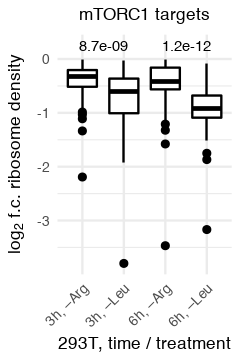

In [242]:
options(repr.plot.width = 2., repr.plot.height = 3)

samplenames  <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h' = '3h, –Arg',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h' = '3h, –Leu',
            'X293t_arg_6h.vs.X293t_rich_6h' = '6h, –Arg',
            'X293t_leu_6h.vs.X293t_rich_6h' = '6h, –Leu'
)


plotdata %>% 
  select(-protein_id, -sum.lfc, -diff_3hWT, -diff_6hWT) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggpubr::ggboxplot(x = 'condition',
                    y = 'lfc',
                    color = 'black', 
                    size = 0.5, 
                    legend = "none") +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8), 
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust =0.5, size=10)) +
  ylab(expression(paste("log"[2], ' f.c. ribosome density'))) +
  xlab("293T, time / treatment") +
  labs(title = 'mTORC1 targets') +
  theme(legend.position="none") +
  annotate("text", x = 3.5, y = .25, label = '<10e-11', size=3) +
  annotate("text", x = 1.5, y = .25, label = '<10e-08', size =3) +
  annotate("segment", x = 2.75, xend = 4.25, y = .12, yend = .12, size = 0.25) +
  annotate("segment", x = 0.75, xend = 2.25, y = .12, yend = .12, size = 0.25) +
  annotate("segment", x = 0.75, xend = 0.75, y = .12, yend = .07, size = 0.25) +
  annotate("segment", x = 2.25, xend = 2.25, y = .12, yend = .07, size = 0.25) +
  annotate("segment", x = 2.75, xend = 2.75, y = .12, yend = .07, size = 0.25) +
  annotate("segment", x = 4.25, xend = 4.25, y = .12, yend = .07, size = 0.25)

#perform Wilcoxon signed rank test for statistical signficance
wilcox.test(plotdata$diff_3hWT, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_6hWT, mu = 0, alternative = "two.sided")

#ggsave('../figures/jitter_mtorc1targets_gt0_293ttc.svg', width = 2, height = 3, units = 'in')

# Log FC Box Plots: ATF4/CHOP targets

## plot difference in log fc for each ATF4/CHOP target gene in -Arg versus -Leu, HEK293T vs HCT116 vs HeLa (supp. fig. 3g, right panel; accompanies fig. 3d/f)

In [218]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for plotting
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

subsettx <- lfcdata %>%
  # select only genes that are upregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_rpC", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) 

# calculate the diff in log fc for each target, -Arg - -Leu
plotdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  mutate(diff_hct116 = hct116_arg - hct116_leu)  %>%
  mutate(diff_hela = hela_arg - hela_leu) %>%
  mutate(diff_293t = X293t_arg - X293t_leu)


	Wilcoxon signed rank test

data:  plotdata$diff_hela
V = 820, p-value = 1.819e-12
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_hct116
V = 742, p-value = 9.334e-07
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test

data:  plotdata$diff_293t
V = 484, p-value = 0.3269
alternative hypothesis: true location is not equal to 0


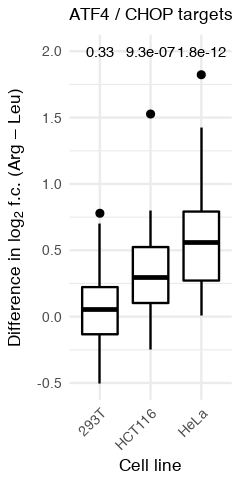

In [220]:
options(repr.plot.width = 2, repr.plot.height = 4)

samplenames  <- c(
    'diff_hct116' = 'HCT116',
    'diff_hela' = 'HeLa',
    'diff_293t' = '293T'
)


plotdata %>% 
  select(gene_name, diff_hct116, diff_hela, diff_293t) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  mutate(condition = forcats::fct_rev(condition)) %>%
  ggpubr::ggboxplot(x = 'condition',
                    y = 'lfc',
                    color = 'black', size = 0.5,
                    legend = "none",
                    order = c('293T','HCT116','HeLa')) + 
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8), 
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust =0.5, size=10)) +
  ylab(expression(paste('Difference in', " log"[2], ' f.c. (Arg – Leu)'))) +
  xlab("Cell line") +
  labs(title = 'ATF4 / CHOP targets') +
  theme(legend.position="none")

#perform Wilcoxon signed rank test for statistical signficance
wilcox.test(plotdata$diff_293t, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_hct116, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_hela, mu = 0, alternative = "two.sided")

#ggsave('../figures/jitter_difflfc_gcn2targets_threshgt0_all3celllines3h.svg', width = 2, height = 3, units = 'in')

## plot absolute log fc values for each ATF4/CHOP target gene in -Arg versus -Leu, HEK293T vs HCT116 vs HeLa (fig. 3f, accompanies fig. 3d)

In [201]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for plotting
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

subsettx <- lfcdata %>%
  #select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_rpC", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id)

# calculate the diff in log fc for each target, -Arg - -Leu
plotdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  mutate(average.lfc = rowMeans(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  mutate(diff_hct116 = hct116_arg - hct116_leu)  %>%
  mutate(diff_hela = hela_arg - hela_leu) %>%
  mutate(diff_293t = X293t_arg - X293t_leu)

mean(plotdata[['diff_293t']])
mean(plotdata[['diff_hct116']])
mean(plotdata[['diff_hela']])


	Wilcoxon signed rank test

data:  plotdata$diff_hela
V = 820, p-value = 1.819e-12
alternative hypothesis: true location is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_hct116
V = 742, p-value = 9.334e-07
alternative hypothesis: true location is not equal to 0


	Wilcoxon signed rank test

data:  plotdata$diff_293t
V = 484, p-value = 0.3269
alternative hypothesis: true location is not equal to 0



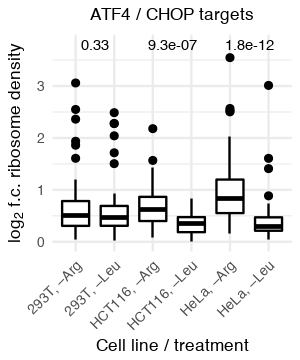

In [206]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

samplenames  <- c(
    'hct116_arg' = 'HCT116, –Arg',
    'hct116_leu' = 'HCT116, –Leu',
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu',
    'diff_293t' = '293T, Arg – Leu',
    'diff_hct116' = 'HCT116, Arg – Leu',
    'diff_hela' = 'HeLa, Arg – Leu'
)

#perform Wilcoxon signed rank test for statistical signficance
hela.p <- wilcox.test(plotdata$diff_hela, mu = 0, alternative = "two.sided") %>% print
hct116.p <- wilcox.test(plotdata$diff_hct116, mu = 0, alternative = "two.sided") %>% print
x293t.p <- wilcox.test(plotdata$diff_293t, mu = 0, alternative = "two.sided") %>% print


plotdata %>% 
  select(-protein_id, -sum.lfc, -average.lfc, -diff_hela, -diff_hct116, -diff_293t) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggpubr::ggboxplot(x = 'condition',
                    y = 'lfc',
                    color = 'black', 
                    size = 0.5, 
                    order = c('293T, –Arg','293T, –Leu','293T, Arg – Leu','HCT116, –Arg','HCT116, –Leu','HCT116, Arg – Leu','HeLa, –Arg','HeLa, –Leu','HeLa, Arg – Leu'),
                    legend = "none") +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8), 
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust =0.5, size=10)) +
  ylab(expression(paste("log"[2], ' f.c. ribosome density'))) +
  xlab("Cell line / treatment") +
  labs(title = 'ATF4 / CHOP targets') +
  theme(legend.position="none") +
  annotate("text", x = 5.5, y = 3.9, label = '<10e-11', size=3) +
  annotate("text", x = 3.5, y = 3.9, label = '<10e-06', size=3) +
  annotate("text", x = 1.5, y = 3.9, label = '>0.05', size=3) +
  annotate("segment", x = 4.75, xend = 6.25, y = 3.77, yend = 3.77, size = 0.25) +
  annotate("segment", x = 2.75, xend = 4.25, y = 3.77, yend = 3.77, size = 0.25) +
  annotate("segment", x = 0.75, xend = 2.25, y = 3.77, yend = 3.77, size = 0.25) +
  annotate("segment", x = 0.75, xend = 0.75, y = 3.77, yend = 3.72, size = 0.25) +
  annotate("segment", x = 2.25, xend = 2.25, y = 3.77, yend = 3.72, size = 0.25) +
  annotate("segment", x = 2.75, xend = 2.75, y = 3.77, yend = 3.72, size = 0.25) +
  annotate("segment", x = 4.25, xend = 4.25, y = 3.77, yend = 3.72, size = 0.25) +
  annotate("segment", x = 4.75, xend = 4.75, y = 3.77, yend = 3.72, size = 0.25) +
  annotate("segment", x = 6.25, xend = 6.25, y = 3.77, yend = 3.72, size = 0.25) 

#ggsave('../figures/jitter_gcn2targets_threshavggt1_all3celllines3h.svg', width = 2.5, height = 3, units = 'in')

## plot absolute log fc values for each ATF4/CHOP target gene in -Arg versus -Leu, 3 hours vs 6 hours (supp. fig. 3f, accompanies supp. fig. 3d)

In [243]:
countdata  <- read_tsv('../tables/cds.counts.20180227.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_20180227_1.tsv', col_types = c(col_character()))


# these are fold changes that are considered for plotting
subset <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h',
            'X293t_arg_6h.vs.X293t_rich_6h',
            'X293t_leu_6h.vs.X293t_rich_6h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  select(-transcript_id)

# calculate the diff in log fc for each target, -Arg - -Leu
plotdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  mutate(diff_3hWT = X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h - X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h)  %>%
  mutate(diff_6hWT = X293t_arg_6h.vs.X293t_rich_6h - X293t_leu_6h.vs.X293t_rich_6h)

mean(plotdata[['diff_3hWT']])
mean(plotdata[['diff_6hWT']])


	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_3hWT
V = 1584.5, p-value = 0.1993
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  plotdata$diff_6hWT
V = 1978, p-value = 0.0005669
alternative hypothesis: true location is not equal to 0


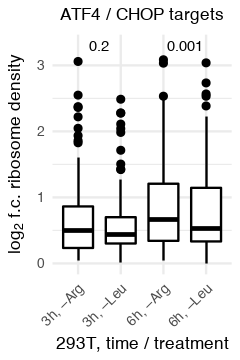

In [244]:
options(repr.plot.width = 2., repr.plot.height = 3)

samplenames  <- c('X293t_rpC_arg_3h.vs.X293t_rpC_rich_3h' = '3h, –Arg',
            'X293t_rpC_leu_3h.vs.X293t_rpC_rich_3h' = '3h, –Leu',
            'X293t_arg_6h.vs.X293t_rich_6h' = '6h, –Arg',
            'X293t_leu_6h.vs.X293t_rich_6h' = '6h, –Leu'
)


plotdata %>% 
  select(-protein_id, -sum.lfc, -diff_3hWT, -diff_6hWT) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggpubr::ggboxplot(x = 'condition',
                    y = 'lfc',
                    color = 'black', 
                    size = 0.5, 
                    legend = "none") +
  theme_minimal(base_family='Helvetica',base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8), 
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust =0.5, size=10)) +
  ylab(expression(paste("log"[2], ' f.c. ribosome density'))) +
  xlab("293T, time / treatment") +
  labs(title = 'ATF4 / CHOP targets') +
  theme(legend.position="none") +
  annotate("text", x = 3.5, y = 3.3, label = '<10e-3', size=3) +
  annotate("text", x = 1.5, y = 3.3, label = '>0.05', size =3) +
  annotate("segment", x = 2.75, xend = 4.25, y = 3.2, yend = 3.2, size = 0.25) +
  annotate("segment", x = 0.75, xend = 2.25, y = 3.2, yend = 3.2, size = 0.25) +
  annotate("segment", x = 0.75, xend = 0.75, y = 3.2, yend = 3.15, size = 0.25) +
  annotate("segment", x = 2.25, xend = 2.25, y = 3.2, yend = 3.15, size = 0.25) +
  annotate("segment", x = 2.75, xend = 2.75, y = 3.2, yend = 3.15, size = 0.25) +
  annotate("segment", x = 4.25, xend = 4.25, y = 3.2, yend = 3.15, size = 0.25)

#perform Wilcoxon signed rank test for statistical signficance
wilcox.test(plotdata$diff_3hWT, mu = 0, alternative = "two.sided")
wilcox.test(plotdata$diff_6hWT, mu = 0, alternative = "two.sided")


#ggsave('../figures/jitter_gcn2targets_gt0_293ttc.svg', width = 2, height = 3, units = 'in')